In [2]:
# Import data
#explore data - eda 
#split

#BUILDING THE MODAL
#baseline - the minimum value for the modal to achieve
#itereate - actual building of the modal
#evaluate

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Build the modal
from sklearn.metrics import mean_absolute_error # to evaluate the modal
from sklearn.utils.validation import check_is_fitted

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)

wrangle function

building a function to do a task repetitively

In [3]:
def wrangle(filepath):
    #read csv into dataframe
    df = pd.read_csv(filepath)

    #subset tp properties in capital federal
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    df =df[mask_ba]
    #subsets to 'apartments'
    mask_apt = df['property_type'] == 'apartment'

    #subbset price_approx usd to less than 400k
    mask_price = df['price_aprox_usd'] < 400000
    df = df[mask_ba & mask_apt & mask_price]
    # Subset Removing outliers on surface area
    low, high =df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df = df[mask_area ]
    
    return df
    

In [4]:
df = wrangle('data/buenos-aires-real-estate-1.csv')
print('df shape:', df.shape)
df.head()

C:\Users\Julio Lito\AppData\Local\Temp\ipykernel_12388\1203991646.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask_ba & mask_apt & mask_price]


df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [103]:
#Check your work
assert (
    len(df) <= 8606
), f" 'df' should have more than 8806 observations, not {len(df)}."

Explorations

In [ ]:
# Add to your wrangle function so that the DataFrame
#  it returns only includes apartments in Buenos Aires ("Capital Federal") 
# that cost less than $400,000 USD. 
# Then recreate df from data/buenos-aires-real-estate-1.csv by re-running the cells above.

In [7]:


mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
mask_ba.value_counts()

place_with_parent_names
True    1343
Name: count, dtype: int64

In [5]:
df['property_type'].unique()
mask_apt = df['property_type'] == 'apartment'
mask_apt.value_counts()

property_type
True    1343
Name: count, dtype: int64

In [6]:
mask_price = df['price_aprox_usd'] < 400000

In [7]:
# Check your work
assert (
    len(df) <= 1781
), f"`df` should have no more than 1781 observations, not {len(df)}."

Explorations Data analysis

In [58]:
#Area Histograms
# Create a histogram of "surface_covered_in_m2". 
# Make sure that the x-axis has the label "Area [sq meters]" 
# and 
# the plot has the title "Distribution of Apartment Sizes".


Text(0.5, 1.0, 'Distribution of Apartment Sizes')

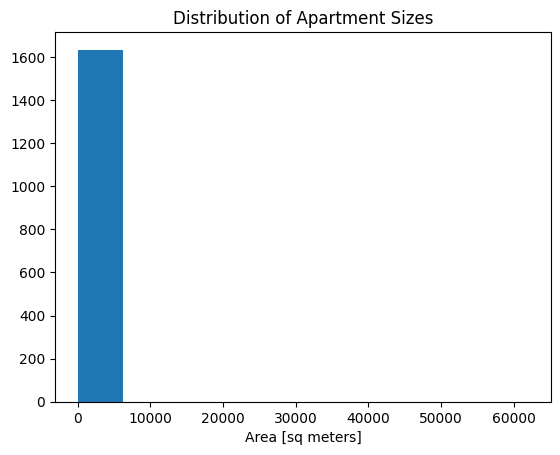

In [90]:
plt.hist(df['surface_covered_in_m2']);
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes')

In [63]:
#Yikes! When you see a histogram like the one above, 
# it suggests that there are outliers in your dataset. 
# This can affect model performance — especially in the sorts of linear models we'll learn about in this project. 
# To confirm, let's look at the summary statistics for the "surface_covered_in_m2" feature.

In [66]:
#AREA SUMMURY STATISTICS
#Calculate the summary statistics for df using the describe method.

df.describe()['surface_covered_in_m2']
#The statistics above confirm what we suspected. 
# While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. 
# The best thing to do is to change our wrangle function and remove them from the dataset.

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [67]:
#Add to your wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column.
#  Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2"

In [106]:
# low, high =df['surface_covered_in_m2'].quantile([0.1, 0.9])
# mask_area = df['surface_covered_in_m2'].between(low, high)
# df[mask_area].head()

Text(0.5, 1.0, 'Distribution of Apartment Sizes')

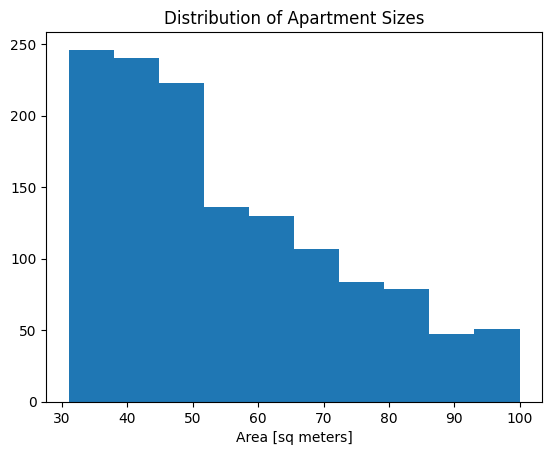

In [107]:
#new Hitogram after wrangling 
plt.hist(df['surface_covered_in_m2']);
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes')

Text(0.5, 1.0, 'Buenos Aires Prices and Area Scatter Plot')

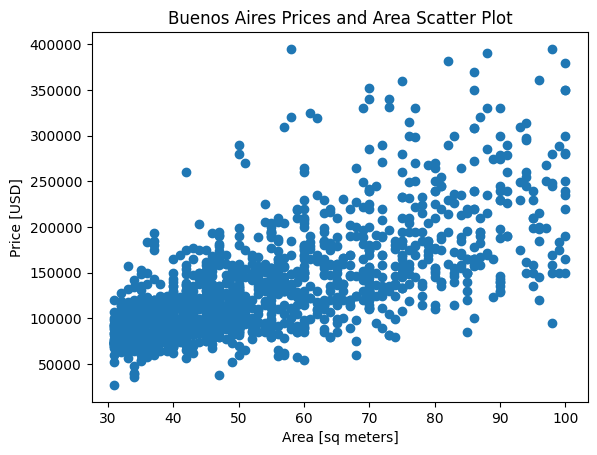

In [110]:
#Prices and Area Scatter Plot
#Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]"

plt.scatter(df['surface_covered_in_m2'], df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires Prices and Area Scatter Plot')


Split

A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

In [12]:
# Create the feature matrix named X_train,
#  which you'll use to train your model. 
# It should contain one feature only: ["surface_covered_in_m2"].
#  Remember that your feature matrix should always be two-dimensional.

In [8]:
features = ['surface_covered_in_m2']
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [9]:
# Check your work
assert X_train.shape == (
    1343,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

In [11]:
#Creating a target vector
#Create the target vector named y_train, 
# which you'll use to train your model. 
# Your target should be "price_aprox_usd".
#  Remember that, in most cases, your target vector should be one-dimensional.

In [10]:
target = 'price_aprox_usd'
y_train = df[target]
y_train.shape

(1343,)

In [11]:
# Check your work
assert y_train.shape == (1343,)

Build Model

Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

In [17]:
#Calculate the mean of your target vector y_train and assign it to the variable y_mean.

In [12]:
y_mean = y_train.mean()
y_mean

np.float64(135527.83871928515)

In [ ]:
#Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y

In [13]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:7]

[np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515)]

In [32]:
#Creating a visualisation

#Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline.
#  Be sure that the line color is orange, and that it has the label "Baseline Model".

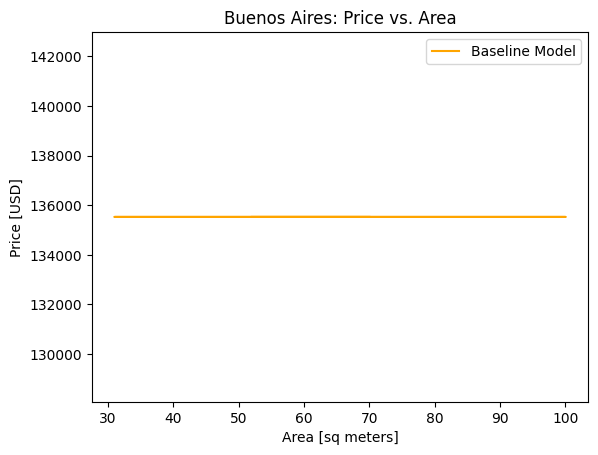

In [10]:
plt.plot(X_train["surface_covered_in_m2"], y_pred_baseline, color='orange', label='Baseline Model')
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

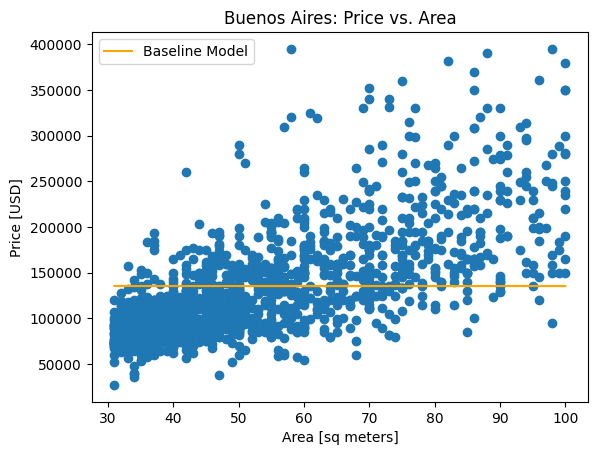

In [11]:
plt.plot(X_train["surface_covered_in_m2"], y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

calculating base line mean absolute error

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate performance metric. There are lots of performance metrics, but the one we'll use here is the mean absolute error.

In [ ]:
# Perfomance metrics is a way of measuring the performance of your model

In [14]:
#mea = mean absolute error

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(mae_baseline, 2))

mean apt price: 135527.84
Baseline MAE: 45199.46


In [42]:
#What does this information tell us? 
# If we always predicted that an apartment price is $135,527.84, our predictions would be off by an average of $45,199.46. 
# It also tells us that our model needs to have mean absolute error below $45,199.46 in order to be useful.

Iterate

In [15]:
#Building the model
model = LinearRegression()


# Check your work
assert isinstance(model, LinearRegression)

In [16]:
#Training the model
model.fit(X_train, y_train)

check_is_fitted(model)

Evaluate

Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [17]:
y_pred_training = model.predict(X_train)
y_pred_training[:7]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668, 178164.36276334,  83533.22342168])

In [18]:
# Check your work
assert (
    len(y_pred_training) == 1343
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

In [21]:
# Training the mean absolute error

#Now that we have predictions,
#  we'll use them to assess our model's performance with the training data.
#  We'll use the same metric we used to evaluate our baseline model: mean absolute error.
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


In [19]:
#Run the code below to import your test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model.
# Make sure the X_train you used to train your model has the same column order as X_test. Otherwise, it may hurt your model's performance.

X_test = pd.read_csv("data/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

Communicate results

In [20]:
# Apartment price (y) = intercept + (coeficient * surface_covered_in_m2)

In [24]:
intercept = round(model.intercept_, 2)
print('Model coeficient:', intercept)
assert any ([isinstance(intercept, int), isinstance(intercept, float)])

Model coeficient: 11433.31


In [28]:
#Getting the coeficient
coeficient = round(model.coef_[0], 2)
print('Model coeficient for "surface_covered_in_m2":', coeficient)
assert any ([isinstance(coeficient, int), isinstance(coeficient, float)])

Model coeficient for "surface_covered_in_m2": 2253.12


In [30]:
#Generate Equation
#Now that we have our intercept and coefficient, we need to insert them into a string that we can print out the complete equation.

In [32]:
# f-string allows to print character values and variable values
print(f"apt_price = {intercept} + {coeficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


plotting the prediction model

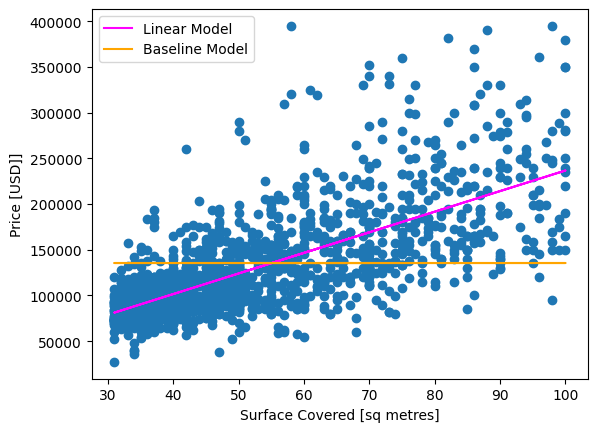

In [45]:
plt.plot(X_train, model.predict(X_train), color="magenta", label="Linear Model")
plt.plot(X_train["surface_covered_in_m2"], y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel('Surface Covered [sq metres]')
plt.ylabel('Price [USD]]')
plt.legend();